# Lab 3: Modeling Air-Drag Using Euler-Cromer Integration

Euler-Cromer integration is one of the most straightforward numerical integrations that give reasonably accurate results. In this lab, you will be tasked with writing a piece of code that uses the Euler-Cromer to solve for motion under the influence of (quadratic) drag. You will then use this code to model a physical situation and use your code to find the model parameters that best fit the data.

## Physics
In class we've talked about *quadratic drag*--air drag that is proportional to $v^2$. The force due to quadratic force can be expressed as:
\begin{equation}
\vec{F}_{\rm drag} = -\frac{1}{2} \rho c_D A |v|^2 \hat{v} 
\end{equation}

Where $\rho$ is the density of the medium the object is moving through, $A$ is the effective area, and $c_D$ is the *drag coefficient*, a non-dimensional term that depends on the shape of the object. 


## Data
Your team has been tasked with determining the drag coefficient for a brand of coffee filters (apparently the FDA requires that now). Your team has measured the effective area of the filter to be $\approx 3.0\times 10^{-1}$ m$^2$, the mass of a single filter to be 0.02 kg, and the air density to be $\approx 1.25$ kg m$^{-3}$.

You've sent away for another group to conduct the actual experiments, and they've just returned with the data. The data consists of three trials, each of which launched the filter with an initial velocity of 12 m/s at an angle of $35^\circ$ __with respect to the horizontal__. The first trial launched the coffee filter from the ground (initial height of 0), the second trial had an initial height of 5 cm (0.05 m), and the final trial had an initial height of 10 cm (0.1 m). 

The folks that ran the experiment say they think that their position accuracy was only about 0.01 m, and their time accuracy was only about 30 milliseconds __(ignore time uncertainty)__. Each trial has an associated CSV file, which has two columns: time and height.

## Culminating Assessment Task
You must write a piece of code that can model the motion of an object under the influence of both gravity and air drag. You will then use that model to find model parameters that best fit the data. 

# Structogram

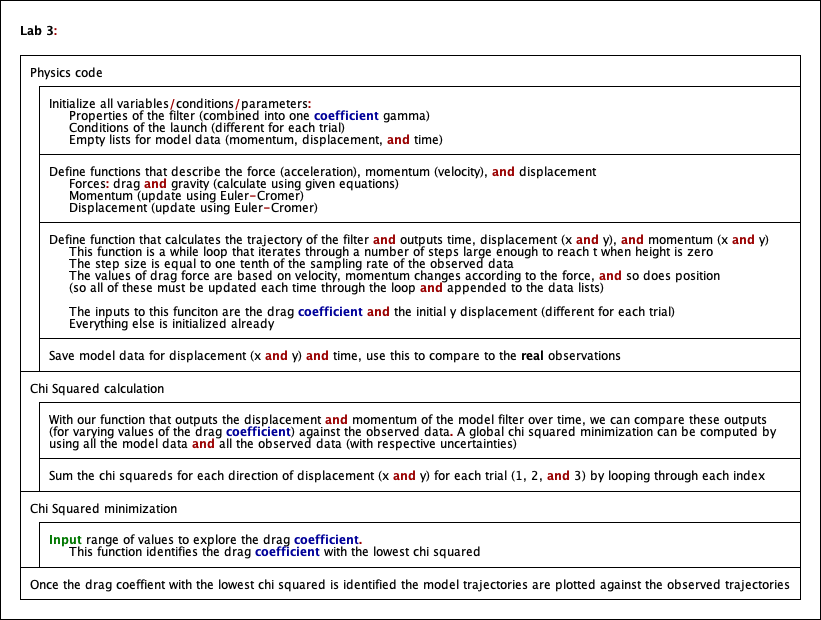

# Generate model data

__Input:__ Parameters of the system: mass, effective area, density of air.

__Output:__ Array of times and positions for model data (predicted trajectory with gravity and quadratic drag); with ability to manipulate drag coefficient

__Explanation:__ This code takes all the inputs (listed below under Parameters and Initial Conditions) and functions (also shown below) and goes through a while loop that adds their outputs to different lists: time, x displacement, and y displacement. First, it uses trig functions to find the x and y components for velocity. Later, variables for displacement, velocity, and momentum will be made using arrays with two elements: the x and y components. Then, functions for force due to gravity, force due to drag, and net force are declared. Before we make our while loop, we have to declare our time step: to get the most accurate data, ours is pretty small (0.00004 seconds). Finally, a fourth function *with_drag* is declared to model the motion of our coffee filter (taking air drag into consideration). Inside this function is a while loop that uses current values of velocity (calculated from momentum) and acceleration (calculated from force) to find the current displacement in the x and y direction. At the end of the loop, the index updates, and the current values are added to the three lists listed above. At the very end, we plot our modeled x and y displacement on the same graph as the experimental data.

__Test Design:__ At the end of the physics section, we will have 3 arrays of model data: time, x displacement, and y displacement. These will have been created with a timestep that’s 100 times smaller than the experimental data’s timestep (for accuracy), but culled (later, in the chi_squared function) so that the final arrays match the timestep of the experimental data.

__Functions:__

$ \vec{F}_{\rm drag} = -\frac{1}{2} \rho c_D A |v|^2 \hat{v} = -\gamma v^2 \hat{v}$

$ \vec{F}_{\rm grav} = -mg \hat{y} $

In diff eq form:

$m x''=-x'\gamma\sqrt(x'^2+y'^2)$

$my''=-mg-y'\gamma\sqrt(x'^2+y'^2)$

__Parameters:__

* Density of air $\rho = 1.25 kg/m^3$
* Effective area $A = 0.3 m^2$
* Mass $m = 0.02 kg$
* Coefficient of drag $c_D = $ UNDEFINED

__Initial Conditions:__

* Trial 1: $x(0) = 0.00 m$, $x'(0) = 12 m/s$, $\theta(0) = 35^\circ$
* Trial 2: $x(0) = 0.05 m$, $x'(0) = 12 m/s$, $\theta(0) = 35^\circ$
* Trial 3: $x(0) = 0.10 m$, $x'(0) = 12 m/s$, $\theta(0) = 35^\circ$



# Find Chi Squared

__Input:__ An input of the drag coefficient will run through a function that generates model data for kinematic motion with air drag and compares that to different trials of actual data.

__Output:__ By comparing a range of drag coefficient values and running it through a function that searches for the minimum value of the output chi squared value, the most ideal drag coefficient can be found.

__Explanation:__ This section performs a function that creates model data for three different trials, reads in experimental data, and then computes the sum of chi squared values for a comparison between the model data and experimental data for each trials. In the model data section, it creates arrays for time, x displacement, and y displacement using the with_drag function from the Physics section. In the trial data section, the data for each trial is read into, then made into arrays (3 for each trial, with the same column headers as the model data). Then, it initializes 9 new arrays, because the model data has 100 timesteps than the experimental data. A for loop will cull only every 100 indices of the model data and put them into a new list, so that the timesteps for the experimental data and model data match. Finally, it finds chi squared value for each trial, and finds the sum.

__Test Design:__ By the end of this section, we will have found the air drag coefficient that results in the lowest chi squared value. This “lowest value” of chi squared is actually the sum of chi squared for each trial. This ideal air drag value will be accurate only to a precision of plus/minus 0.01.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### THE PHYSICS SECTION ###

# Define functions
def force_drag(gamma, v):
  mag_v = np.sqrt(v[0]**2 + v[1]**2)
  F = - gamma * mag_v * v
  return F

def force_grav(m, g):
  F = np.array([0.0, m * g])
  return F

def force_net(F1, F2):
  Fnet = F1 + F2
  return Fnet

def with_drag(c_d, y_init):
  # Parameters
  m = 0.02 # mass of filter in kg
  A = 0.3 # effective area of filter in m^2
  rho = 1.25 # density of air in kg/m^3
  gamma = (0.5)*A*c_d*rho
  g = -9.8

  # Initial conditions
  v0 = 12.0 # initial velocity of filter in m/s^2
  theta = (np.pi/180)*35.0 # launch angle of filter converted to radians
  v0_x = v0 * np.cos(theta) # initial velocity in x direction in m/s^2
  v0_y = v0 * np.sin(theta) # initial velocity in y direction in m/s^2

  # Arrays with x and y components
  di = np.array([0.0,y_init])
  vi = np.array([v0_x,v0_y])
  pi = m * vi

  # Model data lists
  displacementx = []
  displacementy = []
  time = []
  output = []

  # While loop information
  dt = 0.00004 # 0.01*(t_trial_1[1] - t_trial_1[0]) # can change to 0.01*time step of data
  ns = 11000 # t_trial_1[len(t_trial_1)-1]/dt # must be large enough to see the point where filter returns to ground
  index = 0

  # Loop to run Euler-Cromwell Method, output lists of model data
  while index <= ns:
    Fd = force_drag(gamma, vi)
    Fg = force_grav(m, g)
    Fnet = force_net(Fd, Fg)
    anet = (1/m)*Fnet

    pf = pi + Fnet*dt
    vf = (1/m)*pf

    df = di + vf*dt # + (0.5)*anet*dt**2  #;  dt small enough
    displacementx.append(df[0])
    displacementy.append(df[1])

    pi = pf
    vi = vf
    di = df

    time.append(index*dt)
    index = index + 1
  output.append(time)
  output.append(displacementx)
  output.append(displacementy)
  return output

### THE CHI SQUARED SECTION ###

def chi_squared(c_d):
  
  # MODEL DATA
  
  # Run model
  model_1 = with_drag(c_d,0.0)
  model_2 = with_drag(c_d,0.05)
  model_3 = with_drag(c_d,0.1)

  t_model_1 = []
  x_model_1 = []
  y_model_1 = []

  t_model_2 = []
  x_model_2 = []
  y_model_2 = []

  t_model_3 = []
  x_model_3 = []
  y_model_3 = []

  # Make new model lists with every 100th index
  for i in range(100, len(model_1[0]), 100):
    t_model_1.append(model_1[0][i])
    x_model_1.append(model_1[1][i])
    y_model_1.append(model_1[2][i])

    t_model_2.append(model_2[0][i])
    x_model_2.append(model_2[1][i])
    y_model_2.append(model_2[2][i])
    
    t_model_3.append(model_3[0][i])
    x_model_3.append(model_3[1][i])
    y_model_3.append(model_3[2][i])

  # TRIAL DATA

  # Read in the experimental data for comparison purposes
  data_trial_1 = pd.read_csv("filter_position_data_h_of_0_cm.csv")
  data_trial_2 = pd.read_csv("filter_position_data_h_of_5_cm.csv")
  data_trial_3 = pd.read_csv("filter_position_data_h_of_10_cm.csv")

  t_trial_1 = data_trial_1["time"]
  x_trial_1 = data_trial_1["displacement"]
  y_trial_1 = data_trial_1["height"]

  t_trial_2 = data_trial_2["time"]
  x_trial_2 = data_trial_2["displacement"]
  y_trial_2 = data_trial_2["height"]

  t_trial_3 = data_trial_3["time"]
  x_trial_3 = data_trial_3["displacement"]
  y_trial_3 = data_trial_3["height"]
  
  # CHI SQUARED

  chi_sqr_1 = 0
  chi_sqr_2 = 0
  chi_sqr_3 = 0

  for i in range(len(t_trial_1)):
    chi_sqr_inst_1 = ((x_model_1[i] - x_trial_1[i])/(0.01))**2 + ((y_model_1[i] - y_trial_1[i])/(0.01))**2
    chi_sqr_1 += chi_sqr_inst_1

  for i in range(len(t_trial_2)):
    chi_sqr_inst_2 = ((x_model_2[i] - x_trial_2[i])/(0.01))**2 + ((y_model_2[i] - y_trial_2[i])/(0.01))**2
    chi_sqr_2 += chi_sqr_inst_2

  for i in range(len(t_trial_3)):
    chi_sqr_inst_3 = ((x_model_3[i] - x_trial_3[i])/(0.01))**2 + ((y_model_3[i] - y_trial_3[i])/(0.01))**2
    chi_sqr_3 += chi_sqr_inst_3

  chi_sqr_sum = chi_sqr_1 + chi_sqr_2 + chi_sqr_3

  return chi_sqr_sum

### THE TEST ###

def find_c_d(c_d_min, c_d_max):
  c_d_list = []
  chi_sqr_list = []
  
  c_d = c_d_min
  step1 = 0.1
  step2 = 0.01
  step3 = 0.001

  chi_0 = chi_squared(0.0)
  chi_last = chi_0

  # Make list of chi squared values 
  while c_d <= c_d_max:
    chi_curr = chi_squared(c_d)
    if chi_last < chi_curr:
      chi_last = chi_0
      break
    c_d_list.append(c_d)
    chi_sqr_list.append(chi_squared(c_d))
    chi_last = chi_curr 
    c_d += step1

  # Turn into arrays to find minimum chi squared value
  chi_sqr_array = np.array(chi_sqr_list)
  c_d_array = np.array(c_d_list)

  c_d_start = c_d_array[np.argmin(chi_sqr_array)] - step1
  c_d_stop = c_d_array[np.argmin(chi_sqr_array)] + step1

  c_d = c_d_start

  # Find minimum chi squared with greater precision
  while c_d < c_d_stop:
    chi_curr = chi_squared(c_d)
    if chi_last < chi_curr:
      c_d_stop = c_d
      c_d_start = c_d - 2*step2
      c_d = c_d_start
      chi_last = chi_0
      break
    chi_last = chi_curr
    c_d += step2
  
  while c_d < c_d_stop:
    chi_curr = chi_squared(c_d)
    if chi_last < chi_curr:
      c_d_final = c_d - step3
      break
    chi_last = chi_curr
    c_d += step3

  print("Yoooo we found the drag coefficient!!!")
  print("c_d = " + str(c_d_final))

In [ ]:
### WHAT'S THE DRAG ###

# find_c_d(0.0, 1.0)

print(chi_squared(0.668))

3727.434769212397


[77712.19467353159, 45075.42840665695, 24770.657193248142, 12730.650738081618, 6345.644563453637, 3888.6439125944157, 4187.576094839194, 6430.199571599158, 10043.808873546648, 14618.773326100947, 19858.647775551282, 25546.870556528687, 31524.085008569215]


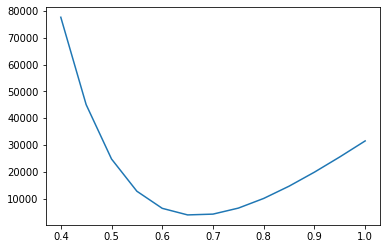

In [ ]:
c_d_array = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
chi_sqr_array = []
for i in range(len(c_d_array)):
  chi_sqr_array.append(chi_squared(c_d_array[i]))

print(chi_sqr_array)

plt.plot(c_d_array, chi_sqr_array)
plt.show()

# NOW make an contour plot of c_d and v0 with chi_sqr

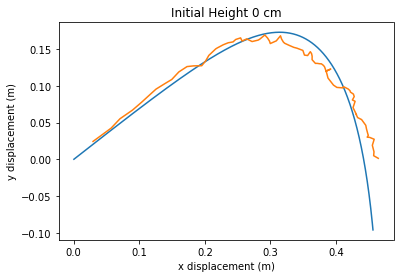

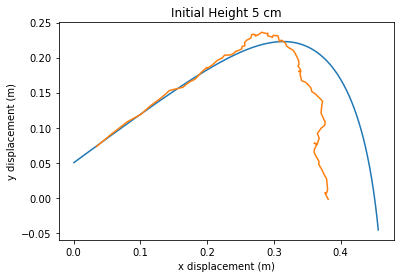

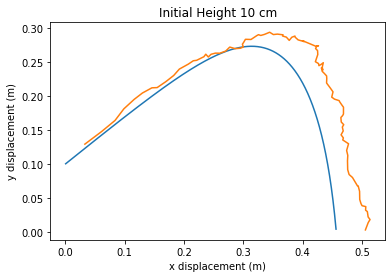

In [ ]:
### PLOT IT ###

c_d = 0.668

# Model runs
model_1 = with_drag(c_d,0.0)
model_2 = with_drag(c_d,0.05)
model_3 = with_drag(c_d,0.1)

# Trial runs
data_trial_1 = pd.read_csv("filter_position_data_h_of_0_cm.csv")
data_trial_2 = pd.read_csv("filter_position_data_h_of_5_cm.csv")
data_trial_3 = pd.read_csv("filter_position_data_h_of_10_cm.csv")

plt.plot(model_1[1], model_1[2])
plt.plot(data_trial_1["displacement"], data_trial_1["height"])
plt.xlabel("x displacement (m)")
plt.ylabel("y displacement (m)")
plt.title("Initial Height 0 cm")
plt.show()

plt.plot(model_2[1], model_2[2])
plt.plot(data_trial_2["displacement"], data_trial_2["height"])
plt.xlabel("x displacement (m)")
plt.ylabel("y displacement (m)")
plt.title("Initial Height 5 cm")
plt.show()


plt.plot(model_3[1], model_3[2])
plt.plot(data_trial_3["displacement"], data_trial_3["height"])
plt.xlabel("x displacement (m)")
plt.ylabel("y displacement (m)")
plt.title("Initial Height 10 cm")
plt.show()